In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
from scipy.stats import f_oneway
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import datetime 
import os

In [2]:
print(os.getcwd())

/Users/innakonar/Desktop/PythonScripts


In [3]:
donnees_nettoyees = pd.read_csv('./données_net.csv')

In [4]:
df=donnees_nettoyees.copy()
df.head()

product_name creator            created_t  \
0                    Salade Cesar      b7  2017-01-16 22:32:58   
1  Danoises à la cannelle roulées      b7  2017-01-15 16:22:50   
2    Chaussons tressés aux pommes      b7  2017-01-15 17:32:08   
3             Pain Burger Artisan      b7  2017-03-02 14:28:16   
4                 Quiche Lorraine      b7  2017-04-11 20:41:47   

   last_modified_t      created_datetime last_modified_datetime  \
0       1484606542  2017-01-16T22:32:58Z   2017-01-16T22:42:22Z   
1       1484501040  2017-01-15T16:22:50Z   2017-01-15T17:24:00Z   
2       1484504972  2017-01-15T17:32:08Z   2017-01-15T18:29:32Z   
3       1488465687  2017-03-02T14:28:16Z   2017-03-02T14:41:27Z   
4       1491944488  2017-04-11T20:41:47Z   2017-04-11T21:01:28Z   

                                              states  \
0  en:to-be-checked, en:complete, en:nutrition-fa...   
1  en:to-be-checked, en:complete, en:nutrition-fa...   
2  en:to-be-checked, en:complete, en:nutrition-fa...   
3  en:to-be-checked, en:complete, en:nutrition-fa...   
4  en:to-be-checked, en:complete, en:nutrition-fa...   

                                         states_tags  \
0  en:to-be-checked,en:complete,en:nutrition-fact...   
1  en:to-be-checked,en:complete,en:nutrition-fact...   
2  en:to-be-checked,en:complete,en:nutrition-fact...   
3  en:to-be-checked,en:complete,en:nutrition-fact...   
4  en:to-be-checked,en:complete,en:nutrition-fact...   

                                           states_fr        main_category  \
0  A vérifier,Complet,Informations nutritionnelle...  en:fresh-vegetables   
1  A vérifier,Complet,Informations nutritionnelle...          en:pastries   
2  A vérifier,Complet,Informations nutritionnelle...          en:pastries   
3  A vérifier,Complet,Informations nutritionnelle...          fr:boulange   
4  A vérifier,Complet,Informations nutritionnelle...             en:meals   

   ... fat_100g saturated-fat_100g carbohydrates_100g sugars_100g fiber_100g  \
0  ...    12.00              7.000              23.00       0.000      2.000   
1  ...    14.40              0.000              54.10      28.100      2.050   
2  ...    10.70              2.000              38.70      24.700      2.000   
3  ...     1.11              0.333              53.30       1.110      2.220   
4  ...     6.79              2.860               7.86       0.714      0.357   

   proteins_100g  salt_100g  sodium_100g  nutrition-score-fr_100g  \
0          22.00      2.160        0.850                      6.0   
1           4.79      0.922        0.363                      1.0   
2           3.33      0.647        0.255                      9.0   
3          10.00      1.520        0.600                      1.0   
4           5.36      0.499        0.196                      2.0   

   nutrition-score-uk_100g  
0                      6.0  
1                      0.0  
2                      9.0  
3                      1.0  
4                      2.0  

[5 rows x 26 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36225 entries, 0 to 36224
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             36225 non-null  object 
 1   creator                  36225 non-null  object 
 2   created_t                36225 non-null  object 
 3   last_modified_t          36225 non-null  int64  
 4   created_datetime         36225 non-null  object 
 5   last_modified_datetime   36225 non-null  object 
 6   states                   36225 non-null  object 
 7   states_tags              36225 non-null  object 
 8   states_fr                36225 non-null  object 
 9   main_category            36225 non-null  object 
 10  main_category_fr         36225 non-null  object 
 11  countries                36225 non-null  object 
 12  countries_fr             36225 non-null  object 
 13  brands                   36225 non-null  object 
 14  nutrition_grade_fr    

In [6]:
nutrients = [col for col in df.columns if '100g' in col and 'score' and 'energy' not in col]

In [7]:
nutrients

['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [8]:
nutr_score_vars = ['nutrition-score-fr_100g', 'nutrition-score-uk_100g']
nutr_score_df = df[nutr_score_vars]

In [9]:
df_other_info = df.drop(nutrients + ['nutrition-score-fr_100g', 'nutrition-score-uk_100g','energy_100g'], axis=1)
df_other_info.head()

product_name creator            created_t  \
0                    Salade Cesar      b7  2017-01-16 22:32:58   
1  Danoises à la cannelle roulées      b7  2017-01-15 16:22:50   
2    Chaussons tressés aux pommes      b7  2017-01-15 17:32:08   
3             Pain Burger Artisan      b7  2017-03-02 14:28:16   
4                 Quiche Lorraine      b7  2017-04-11 20:41:47   

   last_modified_t      created_datetime last_modified_datetime  \
0       1484606542  2017-01-16T22:32:58Z   2017-01-16T22:42:22Z   
1       1484501040  2017-01-15T16:22:50Z   2017-01-15T17:24:00Z   
2       1484504972  2017-01-15T17:32:08Z   2017-01-15T18:29:32Z   
3       1488465687  2017-03-02T14:28:16Z   2017-03-02T14:41:27Z   
4       1491944488  2017-04-11T20:41:47Z   2017-04-11T21:01:28Z   

                                              states  \
0  en:to-be-checked, en:complete, en:nutrition-fa...   
1  en:to-be-checked, en:complete, en:nutrition-fa...   
2  en:to-be-checked, en:complete, en:nutrition-fa...   
3  en:to-be-checked, en:complete, en:nutrition-fa...   
4  en:to-be-checked, en:complete, en:nutrition-fa...   

                                         states_tags  \
0  en:to-be-checked,en:complete,en:nutrition-fact...   
1  en:to-be-checked,en:complete,en:nutrition-fact...   
2  en:to-be-checked,en:complete,en:nutrition-fact...   
3  en:to-be-checked,en:complete,en:nutrition-fact...   
4  en:to-be-checked,en:complete,en:nutrition-fact...   

                                           states_fr        main_category  \
0  A vérifier,Complet,Informations nutritionnelle...  en:fresh-vegetables   
1  A vérifier,Complet,Informations nutritionnelle...          en:pastries   
2  A vérifier,Complet,Informations nutritionnelle...          en:pastries   
3  A vérifier,Complet,Informations nutritionnelle...          fr:boulange   
4  A vérifier,Complet,Informations nutritionnelle...             en:meals   

  main_category_fr countries countries_fr              brands  \
0    Légumes frais    Canada       Canada  Kirkland Signature   
1      Pâtisseries    Canada       Canada  Kirkland Signature   
2      Pâtisseries    Canada       Canada  Kirkland Signature   
3         Boulange    Canada       Canada  Kirkland Signature   
4   Plats préparés    Canada       Canada  Kirkland Signature   

  nutrition_grade_fr  
0                  C  
1                  B  
2                  C  
3                  B  
4                  B

In [10]:
def plot_boxplot(df, nutrients):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,6))
    ax = sns.boxplot(data=df[nutrients]/4.184, orient="h", palette="Set2", fliersize=3, linewidth=1)
    ax.set_xscale('log')
    ax.set_xlabel("Value per 100g ",fontsize=15)
    ax.set_ylabel("Nutrient",fontsize=15)
    ax.set_title("Boxplot of Nutrient Values",fontsize=18)
    ax.set_xticks([10, 100, 1000, 10000, 100000])
    ax.set_xticklabels(['10', '100', '1k', '10k', '100k'])
    plt.savefig("my_plot7.JPEG", bbox_inches="tight")
    plt.show()


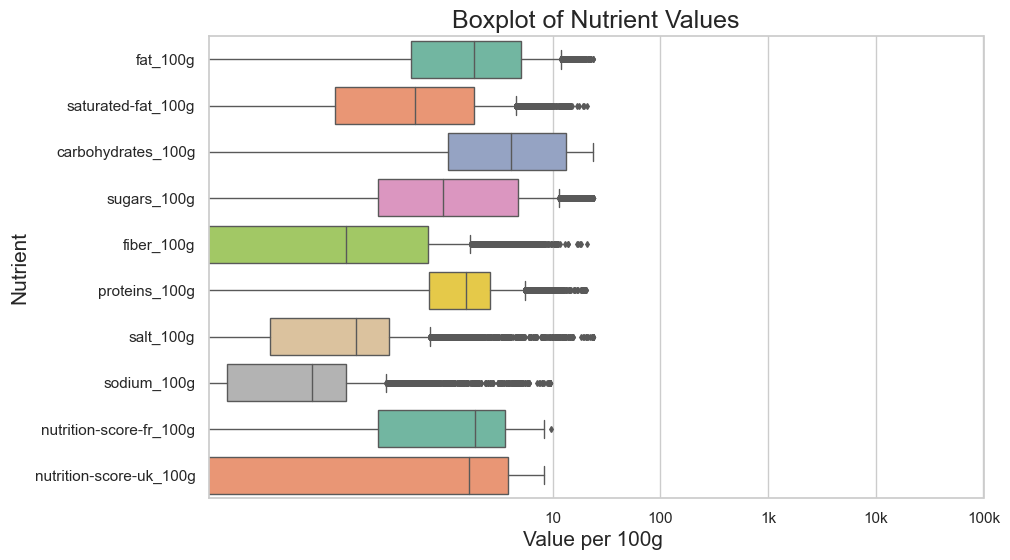

In [11]:
plot_boxplot(df, nutrients);


In [12]:
def plot_energy_distribution(df):
    plt.figure(figsize=(10,6))
    ax = sns.boxplot(x=df['energy_100g'], width=0.3)
    ax.set_xscale('log')
    ax.set_xticks([10, 100, 1000, 10000, 100000])
    ax.set_xticklabels(['10', '100', '1k', '10k', '100k'])
    ax.set_xlabel('Energy per 100g (kJ)')
    ax.set_ylabel('Number of products')
    ax.set_title('Distribution of energy per 100g in food products')
    plt.savefig("my_plot8.JPEG", bbox_inches="tight")
    plt.show()

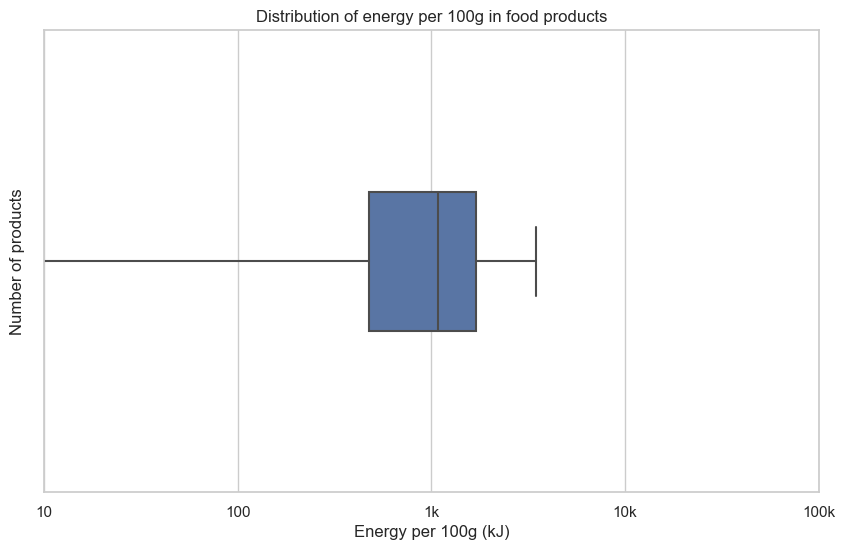

In [13]:
plot_energy_distribution(df)


In [14]:
cols = df.filter(regex='.*100g$').columns.tolist()
nutrients_corr=df[cols].corr()
nutrients_corr

energy_100g  fat_100g  saturated-fat_100g  \
energy_100g                 1.000000  0.757393            0.602598   
fat_100g                    0.757393  1.000000            0.782433   
saturated-fat_100g          0.602598  0.782433            1.000000   
carbohydrates_100g          0.575073 -0.023593           -0.024703   
sugars_100g                 0.416792  0.074871            0.161961   
fiber_100g                  0.260411  0.038339           -0.041846   
proteins_100g               0.207384  0.175262            0.129341   
salt_100g                  -0.027393  0.006055           -0.006044   
sodium_100g                -0.027392  0.006056           -0.006048   
nutrition-score-fr_100g     0.648575  0.611869            0.649400   
nutrition-score-uk_100g     0.687008  0.660787            0.695033   

                         carbohydrates_100g  sugars_100g  fiber_100g  \
energy_100g                        0.575073     0.416792    0.260411   
fat_100g                          -0.023593     0.074871    0.038339   
saturated-fat_100g                -0.024703     0.161961   -0.041846   
carbohydrates_100g                 1.000000     0.618930    0.317779   
sugars_100g                        0.618930     1.000000    0.077687   
fiber_100g                         0.317779     0.077687    1.000000   
proteins_100g                     -0.143697    -0.254260    0.121349   
salt_100g                         -0.069201    -0.098910   -0.026221   
sodium_100g                       -0.069204    -0.098914   -0.026225   
nutrition-score-fr_100g            0.258649     0.498069   -0.137155   
nutrition-score-uk_100g            0.243944     0.461673   -0.131031   

                         proteins_100g  salt_100g  sodium_100g  \
energy_100g                   0.207384  -0.027393    -0.027392   
fat_100g                      0.175262   0.006055     0.006056   
saturated-fat_100g            0.129341  -0.006044    -0.006048   
carbohydrates_100g           -0.143697  -0.069201    -0.069204   
sugars_100g                  -0.254260  -0.098910    -0.098914   
fiber_100g                    0.121349  -0.026221    -0.026225   
proteins_100g                 1.000000   0.079711     0.079717   
salt_100g                     0.079711   1.000000     1.000000   
sodium_100g                   0.079717   1.000000     1.000000   
nutrition-score-fr_100g       0.086993   0.071378     0.071385   
nutrition-score-uk_100g       0.154400   0.078580     0.078588   

                         nutrition-score-fr_100g  nutrition-score-uk_100g  
energy_100g                             0.648575                 0.687008  
fat_100g                                0.611869                 0.660787  
saturated-fat_100g                      0.649400                 0.695033  
carbohydrates_100g                      0.258649                 0.243944  
sugars_100g                             0.498069                 0.461673  
fiber_100g                             -0.137155                -0.131031  
proteins_100g                           0.086993                 0.154400  
salt_100g                               0.071378                 0.078580  
sodium_100g                             0.071385                 0.078588  
nutrition-score-fr_100g                 1.000000                 0.969356  
nutrition-score-uk_100g                 0.969356                 1.000000

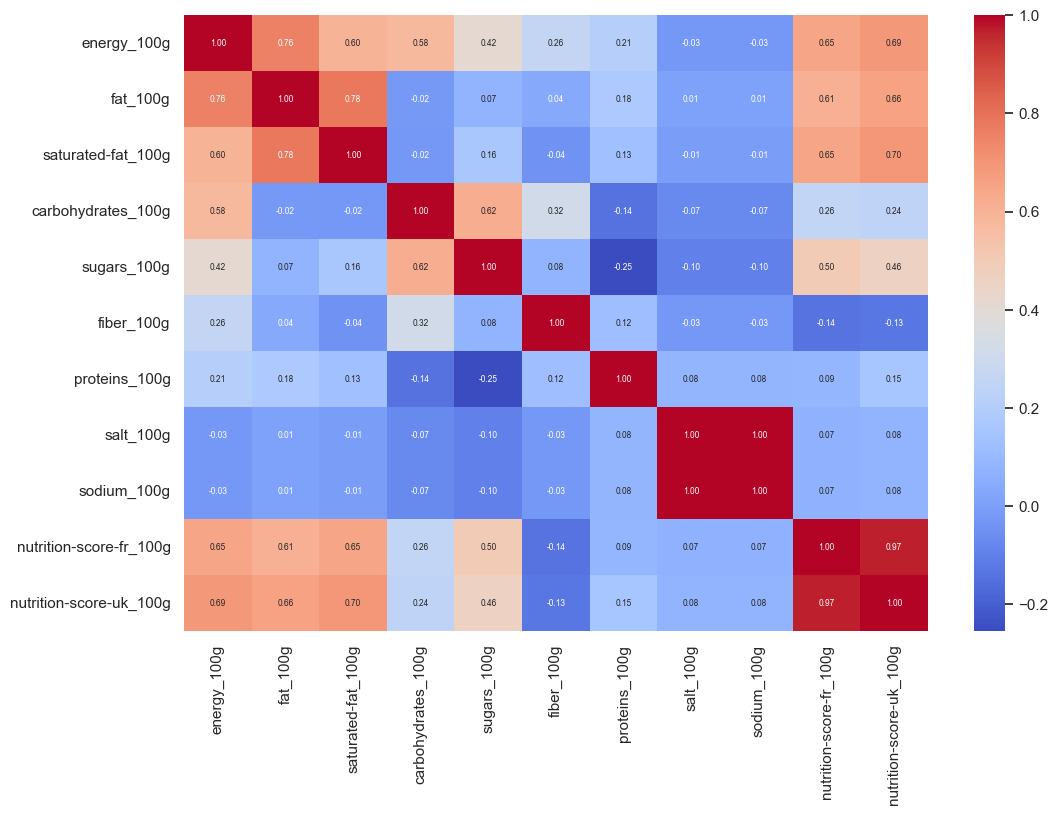

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(nutrients_corr, cmap="coolwarm", annot=True, fmt='.2f', annot_kws={"size": 6})
plt.savefig("my_plot9.JPEG", bbox_inches="tight")

In [16]:
score_fr_corr = df[cols].corrwith(df['nutrition-score-fr_100g'])
score_fr_corr

energy_100g                0.648575
fat_100g                   0.611869
saturated-fat_100g         0.649400
carbohydrates_100g         0.258649
sugars_100g                0.498069
fiber_100g                -0.137155
proteins_100g              0.086993
salt_100g                  0.071378
sodium_100g                0.071385
nutrition-score-fr_100g    1.000000
nutrition-score-uk_100g    0.969356
dtype: float64

In [17]:
def eta_squared(x, y):
    
    grand_mean = np.mean(x)
    group_means = y.groupby(x).mean()

    #  SSE (sum of squares for error)
    sse = np.sum((y - x.map(group_means))**2)

    #  SSTR (sum of squares for treatment)
    sstr = np.sum((group_means - grand_mean)**2)

    # SST (sum of squares total)
    sst = np.sum((y - grand_mean)**2)

    # eta squared
    eta_sq = sstr / sst

    return eta_sq


In [18]:
def f_ANOVA(data): 
   
    X='nutrition-score-fr_100g'
    Y=data.filter(regex='_100g').columns
    nutriment = []
    ANOVA = []
    
    for y in Y:
        nutriment.append(y)
        ANOVA.append(eta_squared(data[X],data[y]))
        
    plot_ANOVA(pd.DataFrame(ANOVA, index=nutriment, columns=['ANOVA']))
        
        
def plot_ANOVA (data: pd.DataFrame):
    fig = px.bar(data,
                 color='ANOVA',
                 y='ANOVA',
                 hover_data=['ANOVA'],
                 title='ANOVA',
                 width=900,
                 height=600)
    fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})
    plt.savefig("my_plot10.JPEG", bbox_inches="tight")
    fig.show()


In [19]:
f_ANOVA(df)

<Figure size 640x480 with 0 Axes>

In [26]:
from scipy.stats import kruskal

def f_ANOVA1(data):
    X = 'nutrition_grade_fr'
    Y = data.filter(regex='_100g').columns
    nutriment = []
    KW_statistic = []
    p_value = []
    
    for y in Y:
        nutriment.append(y)
        categories = [data[y][data[X] == c].dropna() for c in data[X].unique()]
        kw = kruskal(*categories)
        KW_statistic.append(kw.statistic)
        p_value.append(kw.pvalue)
    
    results = pd.DataFrame({'KW_statistic': KW_statistic, 'p_value': p_value}, index=nutriment)
    plot_ANOVA(results)

def plot_ANOVA (data: pd.DataFrame):
    fig = px.bar(data,
                 y='KW_statistic',
                 color='p_value',
                 hover_data=['KW_statistic', 'p_value'],
                 title='Kruskal-Wallis test',
                 width=900,
                 height=600)
    fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})
    pio.write_image(fig, 'my_plot17.jpeg')
    fig.show()


In [27]:
f_ANOVA1(df)

In [22]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [24]:
def f_ANOVA(data):
    X = 'nutrition_grade_fr'
    Y = data.filter(regex='_100g').columns
    nutriment = []
    ANOVA = []
    p_value = []
    
    for y in Y:
        nutriment.append(y)
        categories = [data[y][data[X] == c].dropna() for c in data[X].unique()]
        f, p = f_oneway(*categories)
        ANOVA.append(f)
        p_value.append(p)
    
    results = pd.DataFrame({'ANOVA': ANOVA, 'p_value': p_value}, index=nutriment)
    plot_ANOVA(results)
    
def plot_ANOVA (data: pd.DataFrame):
    fig = px.bar(data,
                 y='ANOVA',
                 color='ANOVA',
                 hover_data=['ANOVA', 'p_value'],
                 title='ANOVA',
                 width=900,
                 height=600)
    fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})
    pio.write_image(fig, 'my_plot19.jpeg')
    fig.show()

    

In [25]:
f_ANOVA (df)

In [28]:
from scipy.stats import f_oneway

nutr_score_df = df[nutr_score_vars]

f_stats, p_value = f_oneway(*[nutr_score_df[var] for var in nutr_score_vars])

print("F-statistic:", f_stats)
print("p-value:", p_value)

F-statistic: 5.05349340074516
p-value: 0.024579334651723177


In [29]:
from scipy.stats import shapiro, bartlett, levene, f_oneway
nutrients_df=df[cols]

for col in nutrients_df.columns:
    stat, p = shapiro(nutrients_df[col])
    print(col, ': Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('    Sample looks Gaussian (fail to reject H0)\n')
    else:
        print('    Sample does not look Gaussian (reject H0)\n')

stat, p = bartlett(*[nutrients_df[col] for col in nutrients_df.columns])
print('Bartlett test for nutrients_df:', 'Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('    Samples have equal variances (fail to reject H0)\n')
else:
    print('    Samples do not have equal variances (reject H0)\n')

for col in nutr_score_df.columns:
    stat, p = shapiro(nutr_score_df[col])
    print(col, ': Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05


energy_100g : Statistics=0.956, p=0.000
    Sample does not look Gaussian (reject H0)

fat_100g : Statistics=0.811, p=0.000
    Sample does not look Gaussian (reject H0)

saturated-fat_100g : Statistics=0.705, p=0.000
    Sample does not look Gaussian (reject H0)

carbohydrates_100g : Statistics=0.870, p=0.000
    Sample does not look Gaussian (reject H0)

sugars_100g : Statistics=0.747, p=0.000
    Sample does not look Gaussian (reject H0)

fiber_100g : Statistics=0.587, p=0.000
    Sample does not look Gaussian (reject H0)

proteins_100g : Statistics=0.852, p=0.000
    Sample does not look Gaussian (reject H0)

salt_100g : Statistics=0.167, p=0.000
    Sample does not look Gaussian (reject H0)

sodium_100g : Statistics=0.167, p=0.000
    Sample does not look Gaussian (reject H0)

nutrition-score-fr_100g : Statistics=0.969, p=0.000
    Sample does not look Gaussian (reject H0)

nutrition-score-uk_100g : Statistics=0.954, p=0.000
    Sample does not look Gaussian (reject H0)

Bartlett 

/Users/innakonar/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



# Calculer de l’ACP

In [31]:
nutrients = df.filter(like='100g').columns.tolist()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[nutrients])

pca = PCA()
pca.fit(data_scaled)

PCA()

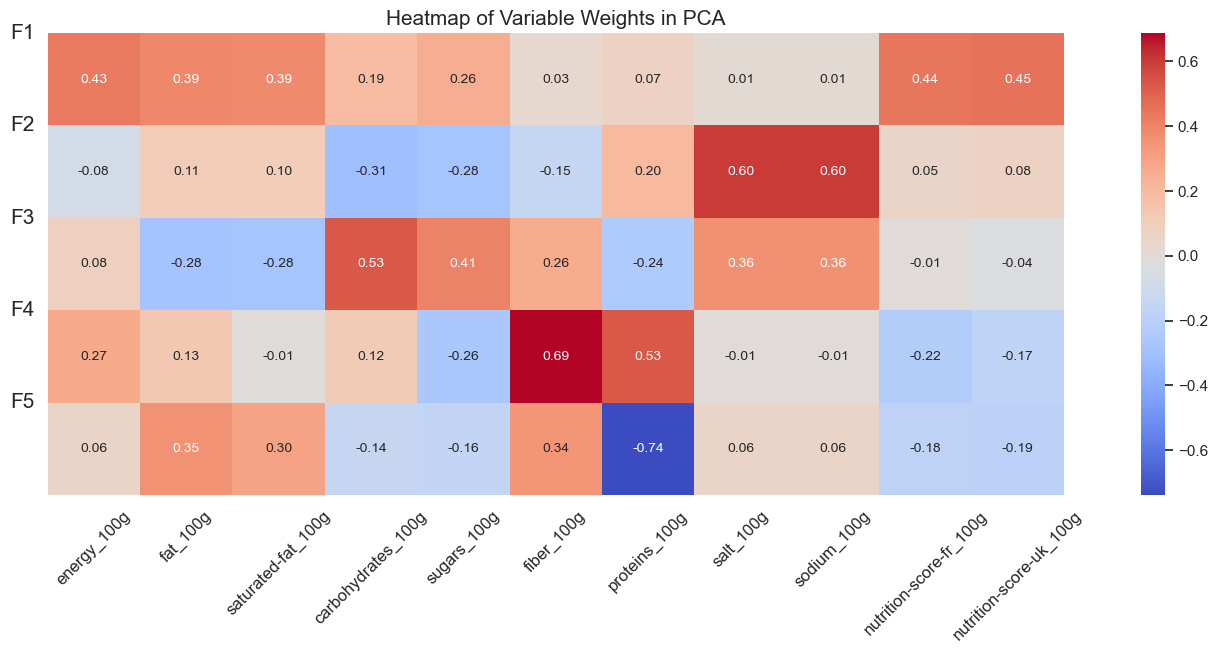

In [52]:
def display_pca_heatmap(pca, n_components):
    nutrients = df.filter(like='100g').columns.tolist()
    components = pca.components_[:n_components,:]
    
    plt.figure(figsize=(20,6))
    ax = sns.heatmap(components, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={"size": 10}, square=True)
    ax.set_xticklabels(nutrients, rotation=45, fontsize=12)
    ax.set_yticks(range(0, n_components))
    ax.set_yticklabels(['F{}'.format(i+1) for i in range(n_components)], rotation=0, fontsize=15)
    plt.title('Heatmap of Variable Weights in PCA', fontsize=15)
    plt.savefig("my_plot11.JPEG", bbox_inches="tight")
    plt.show();

display_pca_heatmap(pca, 5)


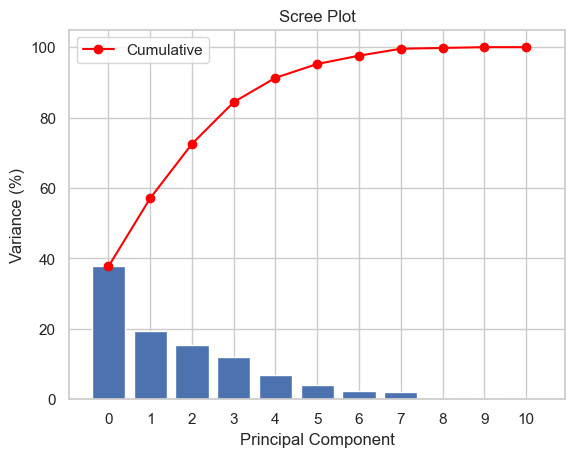

In [49]:
def plot_scree(pca):
    scree = (pca.explained_variance_ratio_ * 100).round(2)
    plt.bar(x=range(len(scree)), height=scree)
    plt.plot(np.cumsum(scree), '-o', label='Cumulative', c='red')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance (%)')
    plt.xticks(range(len(scree)))
    plt.title('Scree Plot')
    plt.legend(loc='best')
    plt.savefig("my_plot12.JPEG", bbox_inches="tight")
    plt.show()

plot_scree(pca)


 """
    Plot the principal components from a PCA analysis.

    Parameters:
        pcs (numpy.ndarray): the principal components, obtained from a PCA analysis.
        variances (numpy.ndarray): the variances explained by each principal component.
        nutrients (list): the names of the nutrients corresponding to each row in pcs.
        axes (tuple): the principal components to plot. The first value corresponds to the x-axis, the second to the y-axis.
        figsize (tuple): the size of the figure to be plotted.

    Returns:
        None
        """

In [56]:
def plot_pca_components(pcs, variances, axes=(0, 1), figsize=(12, 12)):
    
    fig, ax = plt.subplots(figsize=figsize)
    x_axis, y_axis = axes
    plt.scatter(pcs[:, x_axis], pcs[:, y_axis], color='blue')

    for i, (x, y) in enumerate(zip(pcs[:, x_axis], pcs[:, y_axis])):
        plt.annotate(nutrients[i], (x, y), fontsize=12)
        plt.annotate('', xy=(x, y), xytext=(0, 0), arrowprops=dict(arrowstyle='->', color='blue'))

    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

    # Add circle with radius 1
    circle = plt.Circle((0, 0), radius=1, color='red', fill=False)
    ax.add_artist(circle)

    # Set axis limits to show circle
    plt.xlim([-1.2, 1.2])
    plt.ylim([-1.2, 1.2])

    # Add percentage explained variance to axis labels
    pc1_var = round(100 * variances[x_axis], 1)
    pc2_var = round(100 * variances[y_axis], 1)
    plt.xlabel(f"PC{x_axis+1} ({pc1_var}%)")
    plt.ylabel(f"PC{y_axis+1} ({pc2_var}%)")
    plt.savefig("my_plot13.JPEG", bbox_inches="tight")
    plt.show()


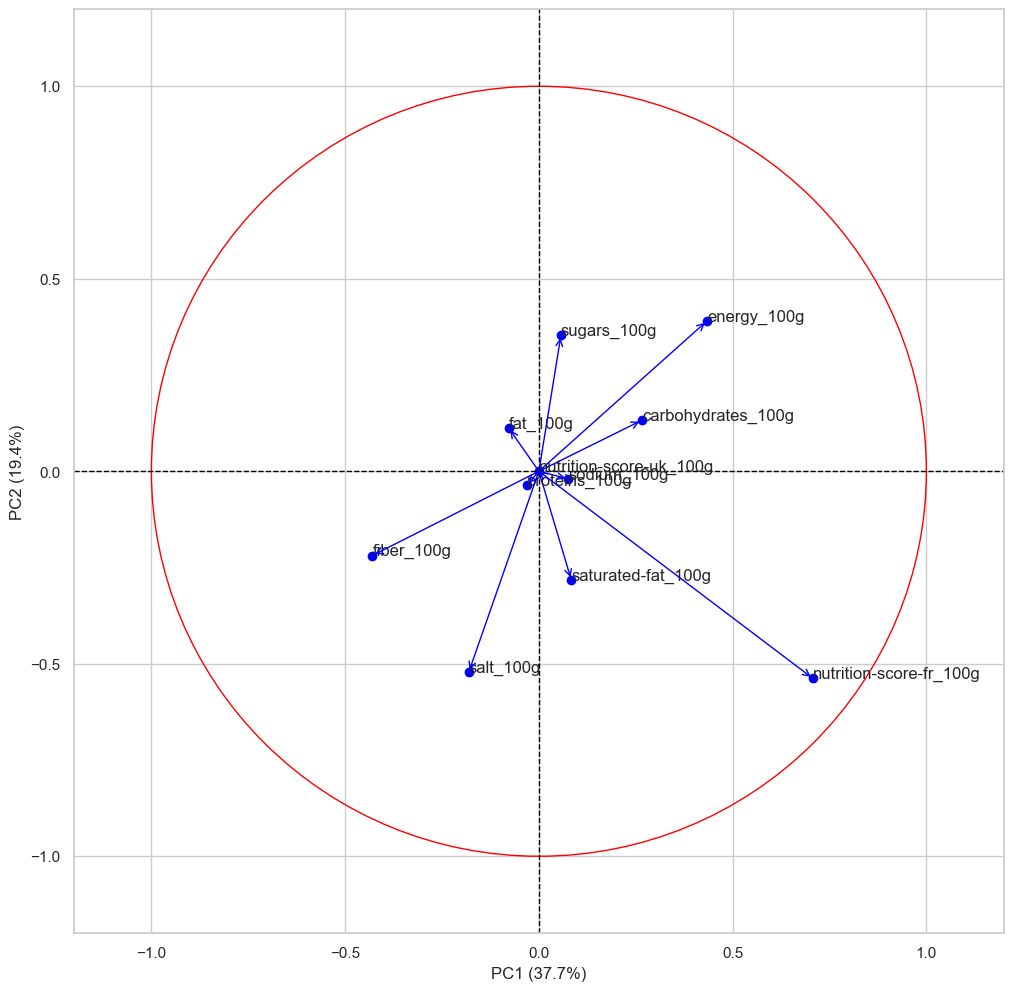

In [59]:
plot_pca_components(pca.components_, pca.explained_variance_ratio_, axes=(0, 1), figsize=(12, 12))

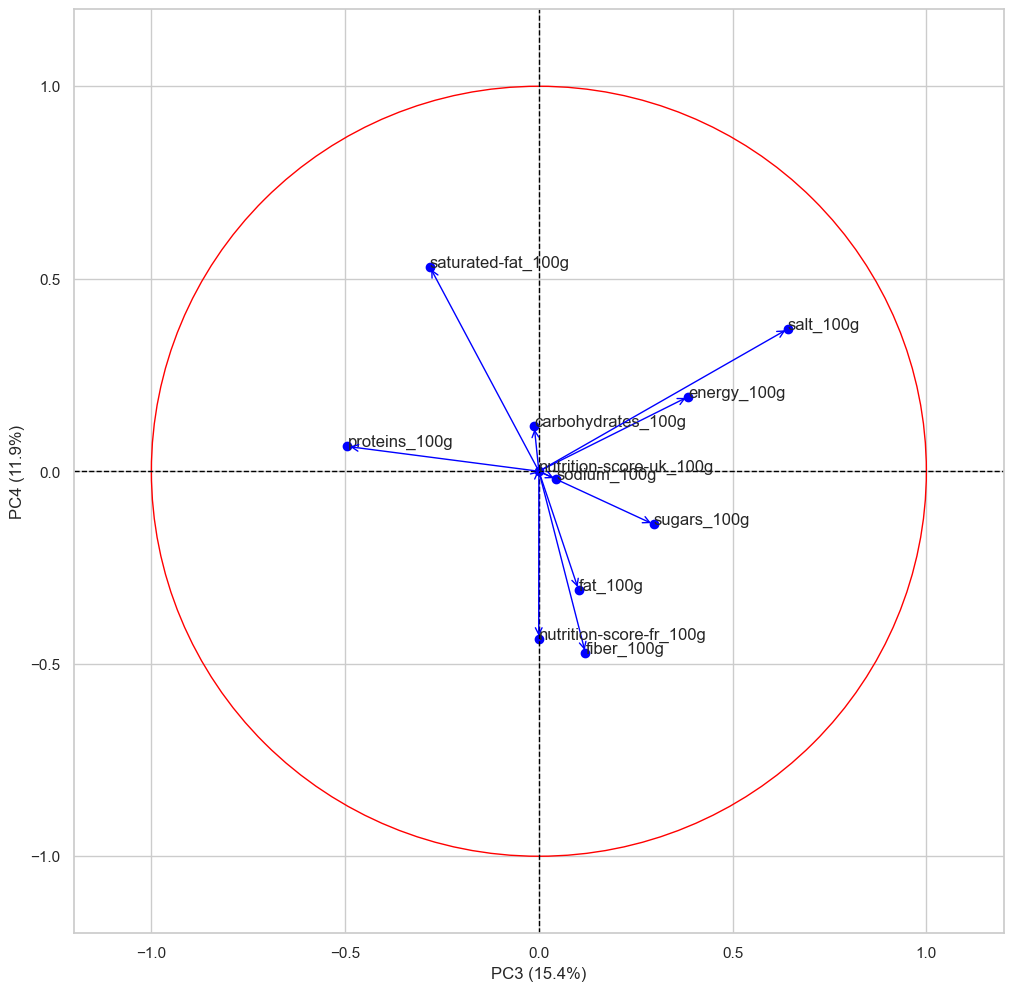

In [58]:
plot_pca_components(pca.components_, pca.explained_variance_ratio_, axes=(2, 3), figsize=(12, 12))

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[nutrients])
pca = PCA()
X_projected = pca.fit_transform(data_scaled)




In [64]:
def display_factorial_planes(X_projected, x_y, pca=None, labels=None, clusters=None, alpha=1, figsize=[10, 8], marker='.'):
    X_ = np.array(X_projected)
    if not figsize:
        figsize = (7, 9)
    if labels is None:
        labels = []
    try:
        len(labels)
    except Exception as e:
        raise e
    if not len(x_y) == 2:
        raise AttributeError('2 axes sont demandées')
    if max(x_y) >= X_.shape[1]:
        raise AttributeError('la variable axis n’est pas bonne')
    
    X, y = x_y
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    c = None if clusters is None else clusters
    sns.scatterplot(data=None, x=X_[:, X], y=X_[:, y], hue=c, alpha=alpha, marker=marker)

    if pca:
        v1 = str(round(100*pca.explained_variance_ratio_[X], 2)) + '%'
        v2 = str(round(100*pca.explained_variance_ratio_[y], 2)) + '%'
    else:
        v1 = v2 = ''
    ax.set_xlabel(f'PC{X+1} ({v1})')
    ax.set_ylabel(f'PC{y+1} ({v2})')

    x_max = np.abs(X_[:, X]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1

    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0, 0], [-y_max, y_max], color='grey', alpha=0.8)

    if len(labels):
        for i, (_x, _y) in enumerate(X_[:, [X, y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize=14, ha='center', va='center')
    plt.savefig("my_plot14.JPEG", bbox_inches="tight")
    plt.title(f'Projection des individus (sur PC{X+1} et PC{y+1})')
    plt.show()


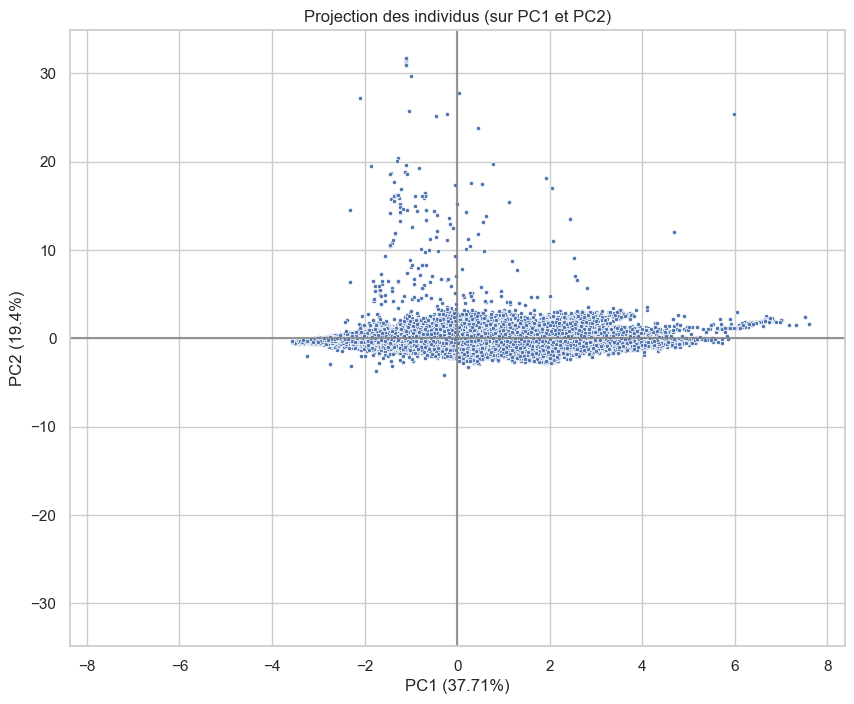

In [65]:
display_factorial_planes(X_projected, [0, 1], pca=pca)

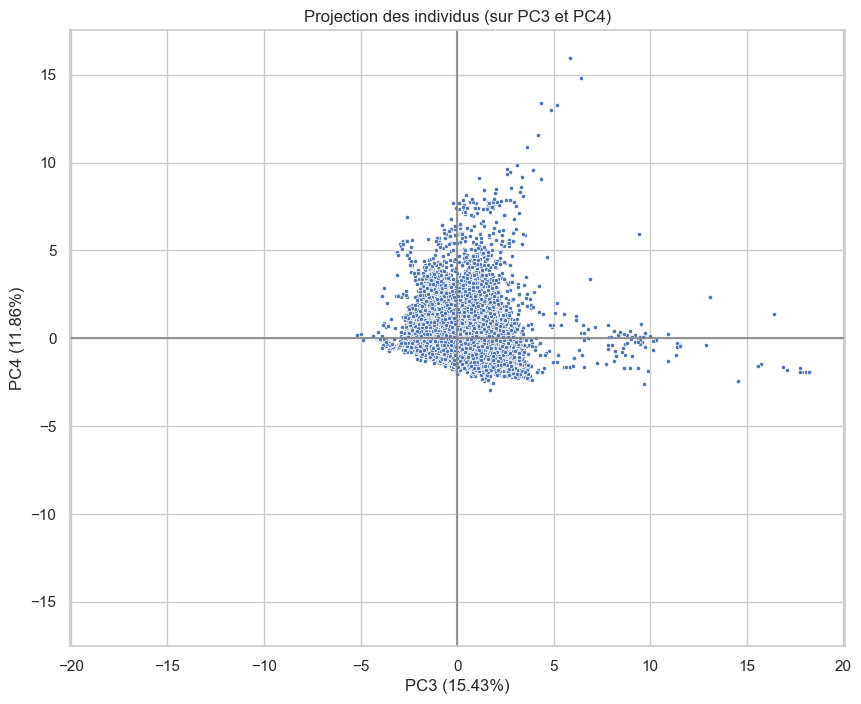

In [66]:
display_factorial_planes(X_projected, [2, 3], pca=pca)